### Obtain

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Scrub

In [4]:
df = df.drop(columns="id") # drop 'id' column
df.head(0)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [5]:
df.info() # check datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.3+ MB


'date' may have to be converted to int64 somehow. Or made into another feature

floors needs conversion. why would there be non-integer floors?

sqft_basement needs conversion to float or integer

yr_renovated be made integer

#### Changing Datatypes

In [6]:
df.floors.describe()

count    21597.000000
mean         1.494096
std          0.539683
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [7]:
df.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

there seems to be a reason for # floors. will keep

In [8]:
df.sqft_basement.describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [9]:
true_objects = []
for val in df.sqft_basement.unique().tolist():
    try:
        float(val)
    except ValueError:
        true_objects.append(val)
print(true_objects)

['?']


removing the '?' entry, so that sqft_basement can be integer

In [10]:
df = df[df.sqft_basement != '?']

In [11]:
df['sqft_basement'] = df.sqft_basement.astype(float)

In [12]:
df.sqft_basement.dtype

dtype('float64')

In [13]:
mod_list = []
for n in df.sqft_basement:
    p = float(n) % 1
    if p > 0:
        mod_list.append(p)
    else:
        continue
print(mod_list)        

[]


refuses integer. because of decimals?

In [14]:
# df.sqft_basement.unique()

In [15]:
df['sqft_basement'] = df.sqft_basement.astype('O')

In [16]:
df.sqft_basement.head()

0      0
1    400
2      0
3    910
4      0
Name: sqft_basement, dtype: object

In [17]:
df['sqft_basement'] = df.sqft_basement.astype('int64')

In [18]:
# df.sqft_basement.str.rstrip('.0')

In [19]:
# df.sqft_basement.unique()

In [20]:
true_objects = []
for val in df.sqft_basement.unique().tolist():
    try:
        float(val)
    except ValueError:
        true_objects.append(val)
print(true_objects)

[]


In [21]:
df.sqft_basement.dtype

dtype('int64')

waterfront is mostly empty so drop it

In [22]:
df.waterfront[df.waterfront > 0].describe()

count    142.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: waterfront, dtype: float64

In [23]:
df.waterfront[df.waterfront == 0].shape[0]

18662

In [24]:
df.waterfront.shape[0]

21143

In [25]:
df.drop(['waterfront'], axis=1, inplace=True);

yr_renovated is similar to waterfront. but will be kept as an example of a boolean

In [26]:
df.yr_renovated[df.yr_renovated > 0].describe()

count     723.000000
mean     1996.053942
std        15.430251
min      1934.000000
25%      1987.000000
50%      2000.000000
75%      2007.500000
max      2015.000000
Name: yr_renovated, dtype: float64

In [27]:
df.yr_renovated[df.yr_renovated == 0].shape[0]

16666

In [28]:
df.yr_renovated.shape[0]

21143

date (sold) likely contains little information

In [29]:
df.drop(['date'], axis=1, inplace=True);

#### Convert Categorical data encoded as integers to String type

categoricals hiding as integers

In [30]:
df.select_dtypes(include='int64').head()

,bedrooms,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,3,1180,5650,3,7,1180,0,1955,98178,1340,5650
1,3,2570,7242,3,7,2170,400,1951,98125,1690,7639
2,2,770,10000,3,6,770,0,1933,98028,2720,8062
3,4,1960,5000,5,7,1050,910,1965,98136,1360,5000
4,3,1680,8080,3,8,1680,0,1987,98074,1800,7503


are categorical vars: yr_built, zipcode

bedroom, condition, grade, are probably discrete numerical

yr_built could be converted to 'age', a numerical var

the rest are true integers

In [31]:
df['zipcode'] = df.zipcode.astype(object)

categoricals hiding as floats

In [32]:
df.select_dtypes(include='float64').head(0)

,price,bathrooms,floors,view,yr_renovated,lat,long


In [33]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [34]:
df.view.dtype

dtype('float64')

view can be made integer later

#### Handle nulls

In [35]:
df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [36]:
df.dropna(subset=['view'], inplace=True);

In [37]:
df.view.isna().sum()

0

In [38]:
df.yr_renovated.isna().sum()

3742

In [39]:
df.yr_renovated.describe()

count    17340.000000
mean        83.111419
std        398.756281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [40]:
df.dropna(subset=['yr_renovated'], inplace=True);

In [41]:
df.yr_renovated.isna().sum()

0

In [42]:
df['view'] = df.view.astype('int64')

In [43]:
df.view.dtype

dtype('int64')

In [44]:
df.isnull().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

#### _(minor)_ Feature engineering

converting 'yr_built' to 'age'

In [45]:
df.yr_built.head()

0    1955
1    1951
3    1965
4    1987
5    2001
Name: yr_built, dtype: int64

In [46]:
age_list = []
for year in df['yr_built']:
    n = 2019-year
    age_list.append(n)

In [47]:
df['age'] = age_list

In [48]:
df.age.head()

0    64
1    68
3    54
4    32
5    18
Name: age, dtype: int64

In [49]:
df.drop(['yr_built'], axis=1, inplace=True);

converting yr_renovated to a boolean

In [50]:
df.yr_renovated.head()

0       0.0
1    1991.0
3       0.0
4       0.0
5       0.0
Name: yr_renovated, dtype: float64

In [51]:
df.yr_renovated[df.yr_renovated > 0].describe()

count     722.000000
mean     1996.055402
std        15.440898
min      1934.000000
25%      1987.000000
50%      2000.000000
75%      2007.750000
max      2015.000000
Name: yr_renovated, dtype: float64

In [52]:
df.yr_renovated[df.yr_renovated > 0].value_counts().sum()

722

there are only 722 years - not a lot of information. "Renovated or Not" is more useful information

In [53]:
yr_list = []
for year in df.yr_renovated:
    if year > 0:
        yr_list.append(1)
    else:
        yr_list.append(0)

In [54]:
df['renovated'] = yr_list

In [55]:
df['renovated'].head()

0    0
1    1
3    0
4    0
5    0
Name: renovated, dtype: int64

In [56]:
df.drop(['yr_renovated'], axis=1, inplace=True);

#### Multicollinearity

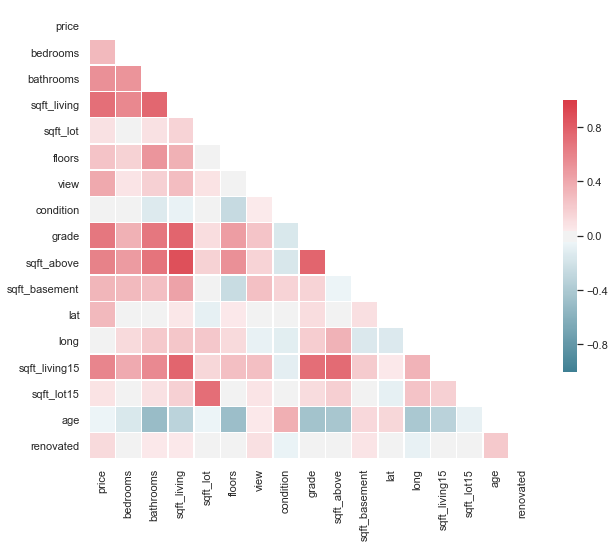

In [57]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

##### Highest Correlations with Target

In [58]:
# abs(df.corr().price) > .5

best predictors of price @ r>.5 : bathrooms, sqft_living, grade, sqft_above, sqft_living15; (r>.7 is too high a threshold for finding price predictors)

##### Feature selection (removal)

In [59]:
# (abs(df.corr()) > .7)
# (abs(df.corr()) > .7).iloc[0:4]
# (abs(df.corr()) > .7).iloc[5:10]
# (abs(df.corr()) > .7).iloc[11:16]

considerably correlated features:

price vs sqft_living, bathrooms vs sqft_living, sqft_living vs grade, sqft_living vs sqft_above, sqft_living vs sqft_living15

grade vs sqft_above, grade vs sqft_living15, sqft_above vs grade, sqft_above vs sqft_living15

sqft_lot15 vs sqft_lot

best candidates for removal (occurances of multicollinearity):
    
sqft_living (5)

grade (4)

sqft_living15 (3)

sqft_lot15 (1)

In [60]:
df.drop(['sqft_living','grade','sqft_living15','sqft_lot15'], axis=1, inplace=True)

In [61]:
df.head(0)

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,sqft_above,sqft_basement,zipcode,lat,long,age,renovated


#### Feature Scaling
is unnecessary for Multiple Linear Regression models. But here is an example

In [62]:
# df.hist(figsize=(10,10));

sqft_above, sqft_basement, & sqft_lot are notably skwed

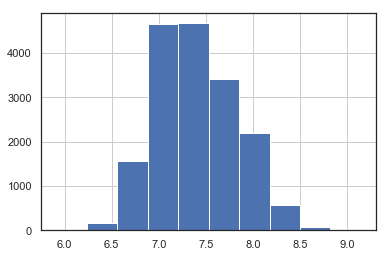

In [63]:
np.log(df.sqft_above).hist();

In [64]:
df['log_sqft_above'] = np.log(df.sqft_above);

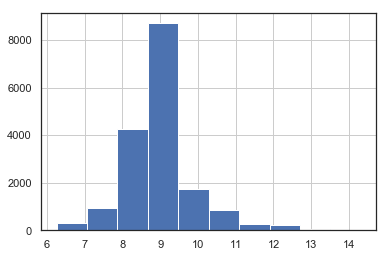

In [65]:
np.log(df.sqft_lot).hist();

In [66]:
df['log_sqft_lot'] = np.log(df.sqft_lot);

C:\Users\Sid\Miniconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


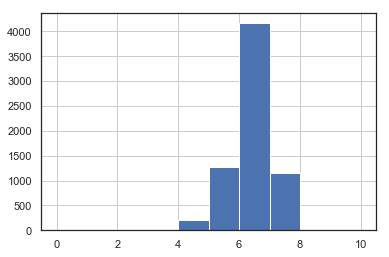

In [67]:
np.log(df.sqft_basement).hist(range=(0,10));

In [68]:
df['log_sqft_basement'] = np.log(df.sqft_basement);

C:\Users\Sid\Miniconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [69]:
print(df.log_sqft_basement.min(), df.log_sqft_basement.max())

-inf 8.480529207044645


In [70]:
inf_clean = []
for n in df.log_sqft_basement:
    if n == float('-inf'):
        inf_clean.append(0)
    else:
        inf_clean.append(n)

In [71]:
# inf_clean[0:14]

In [72]:
# df['log_sqft_basement'].head(13)

In [73]:
df['log_sqft_basement'] = inf_clean

In [74]:
print(df.log_sqft_basement.min(), df.log_sqft_basement.max())

0.0 8.480529207044645


These 3 features have been Log-scaled:

In [75]:
df.drop(['sqft_above','sqft_lot', 'sqft_basement'], axis=1, inplace=True)

They are now smaller (in range and magnitude), more normal, and more readable!

Could scale the target:

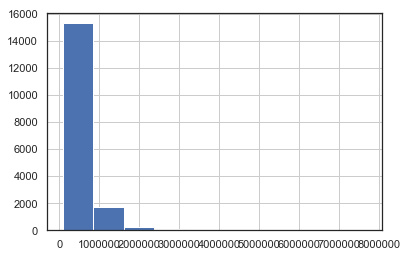

In [76]:
df['price'].hist();

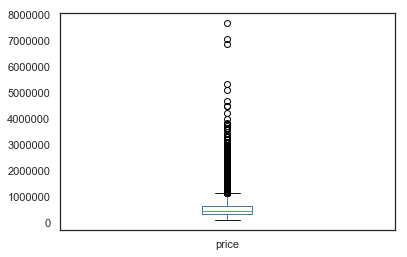

In [77]:
df['price'].plot.box()

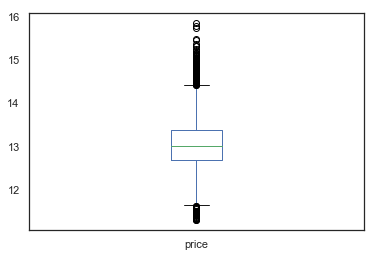

In [78]:
np.log((df['price'])).plot.box();

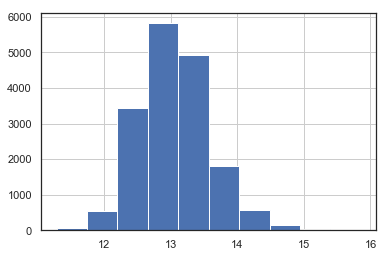

In [79]:
np.log((df['price'])).hist();

#### Categoricals / One-hot encoding

In [80]:
df.select_dtypes(include='object').head()

,zipcode
0,98178
1,98125
3,98136
4,98074
5,98053


zipcode is the only remaining categorical var.

It can be one-hot encoded

In [81]:
zc = df['zipcode']

In [82]:
zc = pd.get_dummies(df['zipcode'])

In [83]:
zc.head()

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# drop zipcode column from df
df.drop(['zipcode'], axis=1, inplace=True);

In [85]:
## to join zipcode dummies to original dataframe
# df = df.join(zc);

In [86]:
# df.head()

### Explore

In [87]:
# df.describe()

In [88]:
# df.hist(figsize=(10,10));

'view' and 'log_sqft_basement' are full of 0's. They _could_ be made into booleans

In [89]:
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17340 entries, 0 to 21596
Data columns (total 13 columns):
price                17340 non-null float64
bedrooms             17340 non-null int64
bathrooms            17340 non-null float64
floors               17340 non-null float64
view                 17340 non-null int64
condition            17340 non-null int64
lat                  17340 non-null float64
long                 17340 non-null float64
age                  17340 non-null int64
renovated            17340 non-null int64
log_sqft_above       17340 non-null float64
log_sqft_lot         17340 non-null float64
log_sqft_basement    17340 non-null float64
dtypes: float64(8), int64(5)
memory usage: 1.9 MB


#### Outliers

In [90]:
str(df.price.dtype)

'float64'

In [91]:
def box_stats(col):
    Q_1 = col.quantile(.25)
    Q_3 = col.quantile(.75)
    IQR = Q_3 - Q_1
    box_min = Q_1-1.5*IQR
    box_max = Q_3+1.5*IQR
    print(box_min, box_max)

Outliers in the target: we could focus on homes rather than mansions

In [92]:
# df['price'].describe()

In [93]:
# df.price.max() - df.price.min()# spread

In [94]:
# box_stats(df.price)

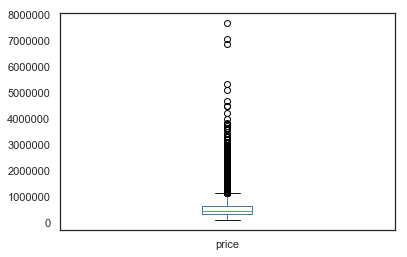

In [95]:
df['price'].plot.box();

In [96]:
df.price[df['price'] > 650000].count()

4188

In [97]:
df.price[df['price'] < 650000].count()

13071

In [98]:
## code to toss 4000 outliers, but that's a bit much
# df = df[df['price'] < 650000] 

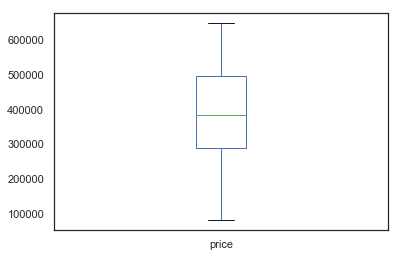

In [99]:
df.price[df['price'] < 650000].plot.box();

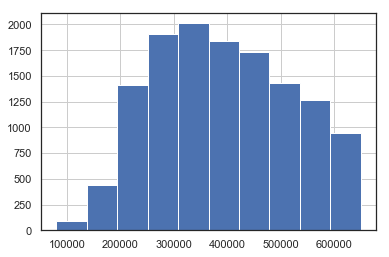

In [100]:
df.price[df['price'] < 650000].hist();

price is fairly normal without outliers

##### Outliers in a predictor

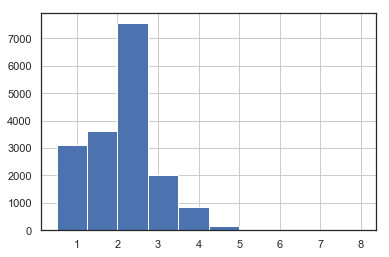

In [101]:
df['bathrooms'].hist();

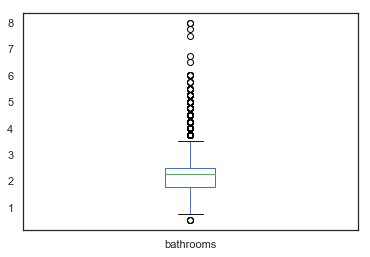

In [102]:
df['bathrooms'].plot.box();
# df.boxplot(column='bathrooms'); # synonym

In [103]:
def box_stats(col):
    Q_1 = col.quantile(.25)
    Q_3 = col.quantile(.75)
    IQR = Q_3 - Q_1
    box_min = Q_1-1.5*IQR
    box_max = Q_3+1.5*IQR
    print(box_min, box_max)

In [104]:
box_stats(df.bathrooms)

0.625 3.625


In [105]:
(df[df['bathrooms'] > 4]).shape

(214, 13)

In [106]:
(df[df['bathrooms'] <= 4]).shape

(17126, 13)

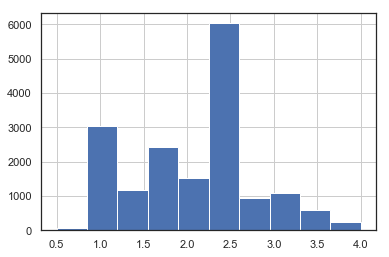

In [107]:
(df['bathrooms'][df['bathrooms'] <= 4]).hist();

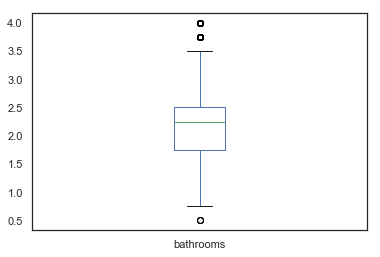

In [108]:
(df['bathrooms'][df['bathrooms'] <= 4]).plot.box();

In [109]:
## to toss 200 outliers
# df = df[df['bathrooms'] <= 4]).shape

#### Other exploration: seaborn plots

In [110]:
# x_vars_list = list(df.columns); x_vars.pop(0); print(x_vars_list)

In [111]:
## Warning! takes several seconds
# sns.pairplot(data=df, x_vars=x_vars_list, y_vars=['price']);

In [112]:
# sns.jointplot(x=df.sqft_basement, y=df.price);

In [113]:
# sns.kdeplot(data=df.price, y=df.log_sqft_basement)

Checking X vs Y linearity via Scatterplots

In [114]:
# sns.set()

In [115]:
# sns.scatterplot(x="bedrooms", y="price", data=df);

In [116]:
# for x_var in list(df.columns):
#     print(sns.scatterplot(x=x_var, y="price", data=df));

### Model

define Outcomes v Columns

In [117]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'lat',
       'long', 'age', 'renovated', 'log_sqft_above', 'log_sqft_lot',
       'log_sqft_basement'],
      dtype='object')

In [118]:
outcome = 'price'

In [119]:
x_cols = list(df.columns); x_cols.pop(0); print(x_cols)

['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'lat', 'long', 'age', 'renovated', 'log_sqft_above', 'log_sqft_lot', 'log_sqft_basement']


Statsmodels- Ordinary Least Squares Regression

In [120]:
# import statsmodels.formula.api import smf # may need this
from statsmodels.formula.api import ols

In [121]:
# fitting the model #OLS
predictors = "+".join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df).fit()

In [122]:
model.summary() # results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     1967.
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        17:26:12   Log-Likelihood:            -2.3940e+05
No. Observations:               17340   AIC:                         4.788e+05
Df Residuals:                   17327   BIC:                         4.789e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5.284e+07   2.07e+06    -25.516      0.000   -5.69e+07   -4.88e+07
bedrooms          -3.971e+04   2500.511    -15.883      0.000   -4.46e+04   -3.48e+04
bathrooms          1.107e+05   4285.280     25.828      0.000    1.02e+05    1.19e+05
floors            -7922.3446   5169.247     -1.533      0.125   -1.81e+04    2209.902
view               1.101e+05   2557.570     43.049      0.000    1.05e+05    1.15e+05
condition          2.911e+04   3093.982      9.408      0.000     2.3e+04    3.52e+04
lat                6.846e+05   1.38e+04     49.702      0.000    6.58e+05    7.12e+05
long              -1.391e+05    1.6e+04     -8.677      0.000   -1.71e+05   -1.08e+05
age                2042.6281     93.485     21.850      0.000    1859.389    2225.867
renovated          5.268e+04   9728.786      5.415      0.000    3.36e+04    7.17e+04
log_sqft_above     4.624e+05   8266.378     55.937      0.000    4.46e+05    4.79e+05
log_sqft_lot       4900.6813   2647.426      1.851      0.064    -288.540    1.01e+04
log_sqft_basement  1.803e+04    752.888     23.951      0.000    1.66e+04    1.95e+04
==============================================================================
Omnibus:                    16533.132   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2112813.335
Skew:                           4.252   Prob(JB):                         0.00
Kurtosis:                      56.404   Cond. No.                     1.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Normality of Predictors

In [123]:
# plt.style.use('ggplot')

In [124]:
# for column in df:
#     df[column].plot.hist(normed=True, label = column+' histogram')
#     df[column].plot.kde(label = column+' kde')
#     plt.legend()
#     plt.show()

In [125]:
# for column in df:
#     df[column].plot.box()
#     plt.legend()
#     plt.show()

#### Checks of Intra-multicollinearity

Another test for multicollinearity is the variance inflation factor. Typically, variables with a vif of 5 or greater (or more definitively 10 or greater) are displaying multicollinearity with other variables in the feature set.

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [159]:
X = df[x_cols]

In [149]:
# vif = [variance_inflation_factor(X.values.i) for i in range(X.shape[1])]
# list(zip(x_cols, vif))

#### Assumptions Necessary for Linear Regression

1) Linearity

2) Normality / Q-Q

3) Homoscedasticity

In [157]:
# import scipy
# from scipy import stats

In [158]:
## Kolmogorov-Smirnov test of Normality
# scipy.stats.kstest()